In [3]:
import sys, time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_style('white')
palette = 'magma_r'
%matplotlib inline

# Step 5. 2D linear convection

Let's first define a 2D uniform grid with coordinates:

$$
\begin{align}
x_i &= x_0 + i \Delta x \\
y_j &= y_0 + j \Delta y
\end{align}
$$

And let us define approximate partial derivatives of an equation $u(t,x,y)$ with two spatial coordinates $x$ and $y$ similarly to how we did for one spatial dimension:

$$
\begin{align}
\frac{\delta u}{\delta t} &\approx \lim_{\Delta t \to 0} \frac{u(t + \Delta t,x,y) - u(t,x,y)}{\Delta t} \\
\frac{\delta u}{\delta x} &\approx \lim_{\Delta x \to 0} \frac{u(t,x + \Delta x,y) - u(t,x,y)}{\Delta x} \\
\frac{\delta u}{\delta y} &\approx \lim_{\Delta y \to 0} \frac{u(t,x,y + \Delta y) - u(t,x,y)}{\Delta y}
\end{align}
$$


We can naturally extend the model of linear convection from 1D to 2D as follows:

$$
\begin{align}
\frac{\delta u}{\delta t} + c \frac{\delta u}{\delta x} + c \frac{\delta u}{\delta y} &= 0
\end{align}
$$

Now subsitute and rearrange.

$$
\begin{align}
\frac{u(t + \Delta t,x,y) - u(t,x,y)}{\Delta t} &+ c \frac{u(t,x + \Delta x,y) - u(t,x,y)}{\Delta x} + c \frac{u(t,x,y + \Delta y) - u(t,x,y)}{\Delta y} = 0 \\
\frac{u(t + \Delta t,x,y) - u(t,x,y)}{\Delta t} &= -c \frac{u(t,x + \Delta x,y) - u(t,x,y)}{\Delta x} - c \frac{u(t,x,y + \Delta y) - u(t,x,y)}{\Delta y} \\
u(t + \Delta t,x,y) - u(t,x,y) &= -c [u(t,x + \Delta x,y) - u(t,x,y)]\frac{\Delta t}{\Delta x} - c [u(t,x,y + \Delta y) - u(t,x,y)]\frac{\Delta t}{\Delta y} \\
u(t + \Delta t,x,y) &= u(t,x,y) - c [u(t,x + \Delta x,y) - u(t,x,y)]\frac{\Delta t}{\Delta x} - c [u(t,x,y + \Delta y) - u(t,x,y)]\frac{\Delta t}{\Delta y} \\
\end{align}
$$

Then convert to the finite difference solver by letting $u_{n,i,j}$ be the value of $u(t,x,y)$ at time step $t_0 + n\Delta t$ and spatial coordinate $(x_0 + i\Delta x, y_0 + j\Delta y)$.

$$
\begin{align}
u_{n+1,i,j} &= u_{n,i,j} - c [u_{n,i+1,j} - u_{n,i,j}]\frac{\Delta t}{\Delta x} - c [u_{n,i,j+1} - u_{n,i,j}]\frac{\Delta t}{\Delta y} 
\end{align}
$$

c:\users\mtr22\code\miniconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


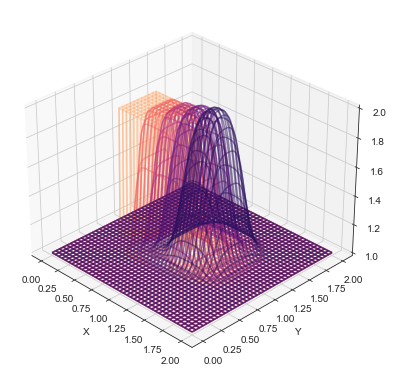

In [4]:
# 2D linear convection
n_t = 100
n_x = 81
n_y = 81

dx = 2 / (n_x - 1)
dy = 2 / (n_y - 1)
sigma = 0.2
dt = sigma * dx

mod = 20

c = 1.0 # the wave speed

# color by time step
colors = iter(sns.color_palette(palette, n_t//mod))

# spatial grid points
x = np.linspace(0, (n_x-1)*dx, n_x)
y = np.linspace(0, (n_y-1)*dy, n_y)

# initial conditions
u = np.ones((n_t, n_x, n_y))
u[0,int(0.5/dx):int(1/dx+1),int(0.5/dy):int(1/dy+1)] = 2.0

fig = plt.figure(figsize=(9, 5))
ax = Axes3D(fig)
ax.force_zorder = True
X, Y = np.meshgrid(x, y)
surf = ax.plot_wireframe(X, Y, u[0], color=next(colors), alpha=0.5)

for n in range(1, n_t):
    u[n,1:,1:] = (
        u[n-1,1:,1:]
        - c*(u[n-1,1:,1:] - u[n-1,:-1,1:])*dt/dx
        - c*(u[n-1,1:,1:] - u[n-1,1:,:-1])*dt/dy
    )
    if n%mod == 0:
        surf = ax.plot_wireframe(X, Y, u[n], color=next(colors), alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.view_init(30, -45)

# Step 6. 2D nonlinear convection

The nonlinear convection model can be easily extended to 2D as well:

$$
\begin{align}
\frac{\delta u}{\delta t} + u \frac{\delta u}{\delta x} + c \frac{\delta u}{\delta y} &= 0
\end{align}
$$

Just subsitute and rearrange.

$$
\begin{align}
\frac{u(t + \Delta t,x,y) - u(t,x,y)}{\Delta t} &+ u(t,x,y) \frac{u(t,x + \Delta x,y) - u(t,x,y)}{\Delta x} + u(t,x,y) \frac{u(t,x,y + \Delta y) - u(t,x,y)}{\Delta y} = 0\\
\frac{u(t + \Delta t,x,y) - u(t,x,y)}{\Delta t} &= - u(t,x,y) \frac{u(t,x + \Delta x,y) - u(t,x,y)}{\Delta x} - u(t,x,y) \frac{u(t,x,y + \Delta y) - u(t,x,y)}{\Delta y} \\
u(t + \Delta t,x,y) - u(t,x,y) &= - u(t,x,y) [u(t,x + \Delta x,y) - u(t,x,y)]\frac{\Delta t}{\Delta x} - u(t,x,y) [u(t,x,y + \Delta y) - u(t,x,y)]\frac{\Delta t}{\Delta y} \\
u(t + \Delta t,x,y) &= u(t,x,y) - u(t,x,y) [u(t,x + \Delta x,y) - u(t,x,y)]\frac{\Delta t}{\Delta x} - u(t,x,y) [u(t,x,y + \Delta y) - u(t,x,y)]\frac{\Delta t}{\Delta y} \\
\end{align}
$$

Then convert to the finite difference solver by letting $u_{n,i,j}$ be the value of $u(t,x,y)$ at time step $t_0 + n\Delta t$ and spatial coordinate $(x_0 + i\Delta x, y_0 + j\Delta y)$.

$$
\begin{align}
u_{n+1,i,j} &= u_{n,i,j} - u_{n,i,j} [u_{n,i+1,j} - u_{n,i,j}]\frac{\Delta t}{\Delta x} - u_{n,i,j} [u_{n,i,j+1} - u_{n,i,j}]\frac{\Delta t}{\Delta y} 
\end{align}
$$

c:\users\mtr22\code\miniconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


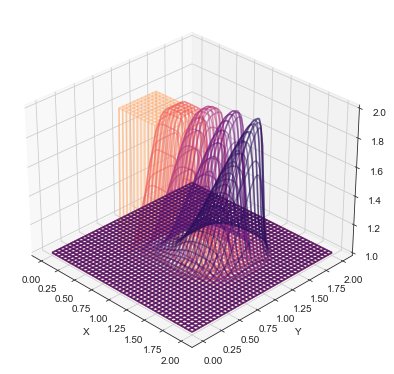

In [32]:
# 2D nonlinear convection
n_t = 100
n_x = 81
n_y = 81

dx = 2 / (n_x - 1)
dy = 2 / (n_y - 1)
sigma = 0.2
dt = sigma * dx

mod = 20

c = 1.0 # the wave speed

# color by time step
colors = iter(sns.color_palette(palette, n_t//mod))

# spatial grid points
x = np.linspace(0, (n_x-1)*dx, n_x)
y = np.linspace(0, (n_y-1)*dy, n_y)

# initial conditions
u = np.ones((n_t, n_x, n_y))
u[0,int(0.5/dx):int(1/dx+1),int(0.5/dy):int(1/dy+1)] = 2.0

fig = plt.figure(figsize=(9, 5))
ax = Axes3D(fig)
X, Y = np.meshgrid(x, y)
surf = ax.plot_wireframe(X, Y, u[0], color=next(colors), alpha=0.5)

for n in range(1, n_t):
    u[n,1:,1:] = (
        u[n-1,1:,1:]
        - u[n-1,1:,1:]*(u[n-1,1:,1:] - u[n-1,:-1,1:])*dt/dx
        - u[n-1,1:,1:]*(u[n-1,1:,1:] - u[n-1,1:,:-1])*dt/dy
    )
    if n%mod == 0:
        surf = ax.plot_wireframe(X, Y, u[n], color=next(colors), alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.view_init(30, -45)

# Step 7. 2D diffusion

In a similar way, we can extend the one-dimensional diffusion model to two spatial dimensions.
$$
\begin{align}
\frac{\delta u}{\delta t} &= v \frac{\delta^2 u}{\delta x^2} + v \frac{\delta^2 u}{\delta y^2}
\end{align}
$$

Substitute the approximate first and second derivatives into the diffusion equation, then rearrange to solve for the next time step of $u$.

$$
\begin{align}
\frac{u(t + \Delta t,x,y) - u(t,x,y)}{\Delta t} &= v \frac{u(t,x + \Delta x,y) - 2 u(t,x,y) + u(t,x - \Delta x,y)}{\Delta x^2} + v \frac{u(t,x,y + \Delta y) - 2 u(t,x,y) + u(t,x,y - \Delta y)}{\Delta y^2} \\
u(t + \Delta t,x,y) - u(t,x,y) &= v[u(t,x + \Delta x,y) - 2 u(t,x,y) + u(t,x - \Delta x,y)]\frac{\Delta t}{\Delta x^2} + v[u(t,x,y + \Delta y) - 2 u(t,x,y) + u(t,x,y - \Delta y)]\frac{\Delta t}{\Delta y^2} \\
u(t + \Delta t,x,y) &= u(t,x,y) + v[u(t,x + \Delta x,y) - 2 u(t,x,y) + u(t,x - \Delta x,y)]\frac{\Delta t}{\Delta x^2} + v[u(t,x,y + \Delta y) - 2 u(t,x,y) + u(t,x,y - \Delta y)]\frac{\Delta t}{\Delta y^2} \\
\end{align}
$$

Then just convert it to the finite difference solver.

$$
\begin{align}
u_{n+1,i,j} &= u_{n,i,j} + v[u_{n,i+1,j} - 2 u_{n,i,j} + u_{n,i-1,j}]\frac{\Delta t}{\Delta x^2} + v[u_{n,i,j+1} - 2 u_{n,i,j} + u_{n,i,j-1}]\frac{\Delta t}{\Delta y^2}
\end{align}
$$


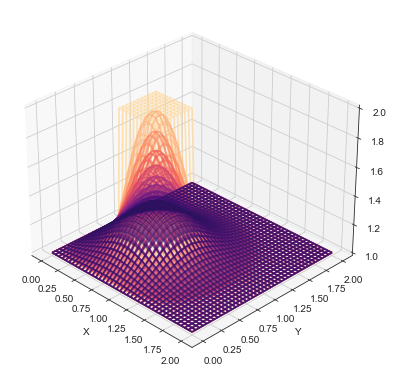

In [33]:
# 2D diffusion
n_t = 100
n_x = 41
n_y = 41

dx = 2 / (n_x - 1)
dy = 2 / (n_y - 1)
sigma = 0.05
dt = sigma * dx

mod = 10

v = 0.25 # the viscosity

# color by time step
colors = iter(sns.color_palette(palette, n_t//mod+1))

# spatial grid points
x = np.linspace(0, (n_x-1)*dx, n_x)
y = np.linspace(0, (n_y-1)*dy, n_y)

# initial conditions
u = np.ones((n_t, n_x, n_y))
u[0,int(0.5/dx):int(1/dx+1),int(0.5/dy):int(1/dy+1)] = 2.0

fig = plt.figure(figsize=(9, 5))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
X, Y = np.meshgrid(x, y)
surf = ax.plot_wireframe(X, Y, u[0], color=next(colors), alpha=0.5)

for n in range(1, n_t):
    u[n,1:-1,1:-1] = (
        u[n-1,1:-1,1:-1]
        + v*(u[n-1,2:,1:-1] - 2*u[n-1,1:-1,1:-1] + u[n-1,:-2,1:-1])*dt/dx**2
        + v*(u[n-1,1:-1,2:] - 2*u[n-1,1:-1,1:-1] + u[n-1,1:-1,:-2])*dt/dy**2
    )
    if n%mod == 0:
        surf = ax.plot_wireframe(X, Y, u[n], color=next(colors), alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.view_init(30, -45)

# Step 8. Burger's equation

Now we will extend Burger's equation to observe both nonlinear convection and diffusion in two spatial dimensions. (I don't understand the introduction of new funcition $v$ and coupled PDE?)

$$
\begin{align}
\frac{\delta u}{\delta t} + u \frac{\delta u}{\delta x} + v \frac{\delta u}{\delta y} &= \nu \left( \frac{\delta^2 u}{\delta x^2} + \frac{\delta^2 u}{\delta y^2} \right) \\
\frac{\delta v}{\delta t} + u \frac{\delta v}{\delta x} + v \frac{\delta v}{\delta y} &= \nu \left( \frac{\delta^2 v}{\delta x^2} + \frac{\delta^2 v}{\delta y^2} \right)
\end{align}
$$

Substitute the derivatives and solve for the next time step of each coupled term. First, we will solve for $u$.

$$
\begin{align}
\frac{u(t + \Delta t,x,y) - u(t,x,y)}{\Delta t} &+ u(t,x,y) \frac{u(t,x + \Delta x,y) - u(t,x,y)}{\Delta x} + v(t,x,y) \frac{u(t,x,y + \Delta y) - u(t,x,y)}{\Delta y} = \nu \frac{u(t,x + \Delta x,y) - 2 u(t,x,y) + u(t,x - \Delta x,y)}{\Delta x^2} + \nu \frac{u(t,x,y + \Delta y) - 2 u(t,x,y) + u(t,x,y - \Delta y)}{\Delta y^2} \\
\frac{u(t + \Delta t,x,y) - u(t,x,y)}{\Delta t} &= -u(t,x,y) \frac{u(t,x + \Delta x,y) - u(t,x,y)}{\Delta x} - v(t,x,y) \frac{u(t,x,y + \Delta y) - u(t,x,y)}{\Delta y} + \nu \frac{u(t,x + \Delta x,y) - 2 u(t,x,y) + u(t,x - \Delta x,y)}{\Delta x^2} + \nu \frac{u(t,x,y + \Delta y) - 2 u(t,x,y) + u(t,x,y - \Delta y)}{\Delta y^2} \\
u(t + \Delta t,x,y) - u(t,x,y) &= -u(t,x,y) [u(t,x + \Delta x,y) - u(t,x,y)] \frac{\Delta t}{\Delta x} - v(t,x,y) [u(t,x,y + \Delta y) - u(t,x,y)] \frac{\Delta t}{\Delta y} + \nu [u(t,x + \Delta x,y) - 2 u(t,x,y) + u(t,x - \Delta x,y)] \frac{\Delta t}{\Delta x^2} + \nu [u(t,x,y + \Delta y) - 2 u(t,x,y) + u(t,x,y - \Delta y)] \frac{\Delta t}{\Delta y^2} \\
u(t + \Delta t,x,y) = u(t,x,y) &- u(t,x,y) [u(t,x + \Delta x,y) - u(t,x,y)] \frac{\Delta t}{\Delta x} - v(t,x,y) [u(t,x,y + \Delta y) - u(t,x,y)] \frac{\Delta t}{\Delta y} + \nu [u(t,x + \Delta x,y) - 2 u(t,x,y) + u(t,x - \Delta x,y)] \frac{\Delta t}{\Delta x^2} + \nu [u(t,x,y + \Delta y) - 2 u(t,x,y) + u(t,x,y - \Delta y)] \frac{\Delta t}{\Delta y^2}
\end{align}
$$

Then, solve for $v$.

$$
\begin{align}
\frac{v(t + \Delta t,x,y) - v(t,x,y)}{\Delta t} &+ u(t,x,y) \frac{v(t,x + \Delta x,y) - v(t,x,y)}{\Delta x} + v(t,x,y) \frac{v(t,x,y + \Delta y) - v(t,x,y)}{\Delta y} = \nu \frac{v(t,x + \Delta x,y) - 2 v(t,x,y) + v(t,x - \Delta x,y)}{\Delta x^2} + \nu \frac{v(t,x,y + \Delta y) - 2 v(t,x,y) + v(t,x,y - \Delta y)}{\Delta y^2} \\
\frac{v(t + \Delta t,x,y) - v(t,x,y)}{\Delta t} &= -u(t,x,y) \frac{v(t,x + \Delta x,y) - v(t,x,y)}{\Delta x} - v(t,x,y) \frac{v(t,x,y + \Delta y) - v(t,x,y)}{\Delta y} + \nu \frac{v(t,x + \Delta x,y) - 2 v(t,x,y) + v(t,x - \Delta x,y)}{\Delta x^2} + \nu \frac{v(t,x,y + \Delta y) - 2 v(t,x,y) + v(t,x,y - \Delta y)}{\Delta y^2} \\
v(t + \Delta t,x,y) - v(t,x,y) &= -u(t,x,y) [v(t,x + \Delta x,y) - v(t,x,y)] \frac{\Delta t}{\Delta x} - v(t,x,y) [v(t,x,y + \Delta y) - v(t,x,y)] \frac{\Delta t}{\Delta y} + \nu [v(t,x + \Delta x,y) - 2 v(t,x,y) + v(t,x - \Delta x,y)] \frac{\Delta t}{\Delta x^2} + \nu [v(t,x,y + \Delta y) - 2 v(t,x,y) + v(t,x,y - \Delta y)] \frac{\Delta t}{\Delta y^2} \\
v(t + \Delta t,x,y) = v(t,x,y) &- u(t,x,y) [v(t,x + \Delta x,y) - v(t,x,y)] \frac{\Delta t}{\Delta x} - v(t,x,y) [v(t,x,y + \Delta y) - v(t,x,y)] \frac{\Delta t}{\Delta y} + \nu [v(t,x + \Delta x,y) - 2 v(t,x,y) + v(t,x - \Delta x,y)] \frac{\Delta t}{\Delta x^2} + \nu [v(t,x,y + \Delta y) - 2 v(t,x,y) + v(t,x,y - \Delta y)] \frac{\Delta t}{\Delta y^2}
\end{align}
$$


Now we can convert to the finite difference solver equations:
$$
\begin{align}
u_{n+1,i,j} &= u_{n,i,j} - u_{n,i,j} [u_{n,i,j} - u_{n,i-1,j}] \frac{\Delta t}{\Delta x} - v_{n,i,j} [u_{n,i,j} - u_{n,i,j-1}] \frac{\Delta t}{\Delta y} + \nu [u_{n,i+1,j} - 2 u_{n,i,j} + u_{n,i-1,j}] \frac{\Delta t}{\Delta x^2} + \nu [u_{n,i,j+1} - 2 u_{n,i,j} + u_{n,i,j-1}] \frac{\Delta t}{\Delta y^2} \\
v_{n+1,i,j} &= v_{n,i,j} - u_{n,i,j} [v_{n,i,j} - v_{n,i-1,j}] \frac{\Delta t}{\Delta x} - v_{n,i,j} [v_{n,i,j} - v_{n,i,j-1}] \frac{\Delta t}{\Delta y} + \nu [v_{n,i+1,j} - 2 v_{n,i,j} + v_{n,i-1,j}] \frac{\Delta t}{\Delta x^2} + \nu [v_{n,i,j+1} - 2 v_{n,i,j} + v_{n,i,j-1}] \frac{\Delta t}{\Delta y^2}
\end{align}
$$

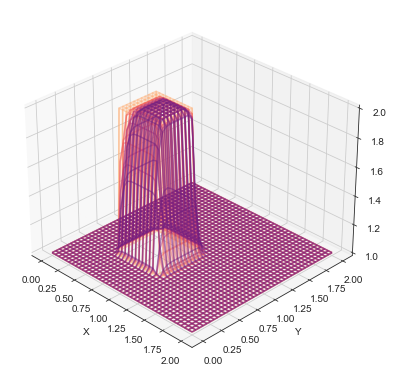

In [38]:
# 2D Burger's equation (coupled)
n_t = 100
n_x = 41
n_y = 41

c = 1.0 # the wave speed
nu = 0.01 # the viscosity

dx = 2 / (n_x - 1)
dy = 2 / (n_y - 1)
sigma = 0.0009
dt = sigma * dx * dy / nu

mod = 25

# color by time step
colors = iter(sns.color_palette(palette, n_t//mod+1))

# spatial grid points
x = np.linspace(0, (n_x-1)*dx, n_x)
y = np.linspace(0, (n_y-1)*dy, n_y)

# initial conditions
u = np.ones((n_t, n_x, n_y))
v = np.ones((n_t, n_x, n_y))
u[0,int(0.5/dx):int(1/dx+1),int(0.5/dy):int(1/dy+1)] = 2.0
v[0,int(0.5/dx):int(1/dx+1),int(0.5/dy):int(1/dy+1)] = 2.0

fig = plt.figure(figsize=(9, 5))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
X, Y = np.meshgrid(x, y)
surf = ax.plot_wireframe(X, Y, u[0], color=next(colors), alpha=0.5)

for n in range(1, n_t):
    u[n,1:-1,1:-1] = (
        u[n-1,1:-1,1:-1]
        - u[n-1,1:-1,1:-1]*(u[n-1,1:-1,1:-1] - u[n-1,:-2,1:-1])*dt/dx
        - v[n-1,1:-1,1:-1]*(u[n-1,1:-1,1:-1] - u[n-1,1:-1,:-2])*dt/dy
        + nu*(u[n-1,2:,1:-1] - 2*u[n-1,1:-1,1:-1] + u[n-1,:-2,1:-1])*dt/dx**2
        + nu*(u[n-1,1:-1,2:] - 2*u[n-1,1:-1,1:-1] + u[n-1,1:-1,:-2])*dt/dy**2
    )
    v[n,1:-1,1:-1] = (
        v[n-1,1:-1,1:-1]
        - u[n-1,1:-1,1:-1]*(v[n-1,1:-1,1:-1] - v[n-1,:-2,1:-1])*dt/dx
        - v[n-1,1:-1,1:-1]*(v[n-1,1:-1,1:-1] - v[n-1,1:-1,:-2])*dt/dy
        + nu*(v[n-1,2:,1:-1] - 2*v[n-1,1:-1,1:-1] + v[n-1,:-2,1:-1])*dt/dx**2
        + nu*(v[n-1,1:-1,2:] - 2*v[n-1,1:-1,1:-1] + v[n-1,1:-1,:-2])*dt/dy**2
    )
    if n%mod == 0:
        surf = ax.plot_wireframe(X, Y, u[n], color=next(colors), alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.view_init(30, -45)